# Layer by Layer approach for bulding a MLP (Multi-Layer Perseptron) Model


## Image 1: 
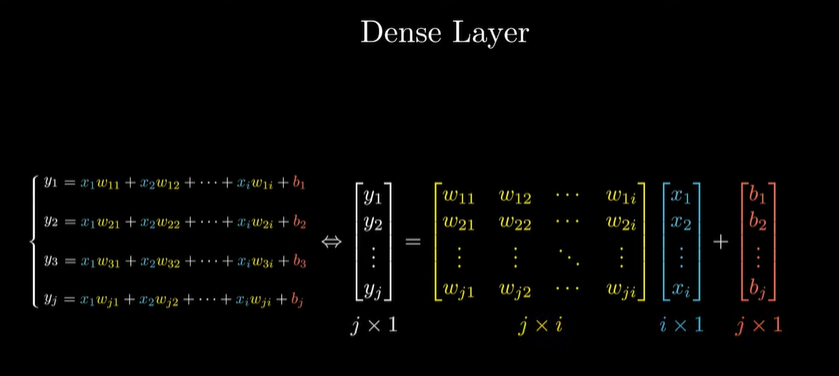

In [23]:
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bars

# Base layer class: A generic layer in the neural network
class Layer:
    def __init__(self, input, output):
        """
        Initialize the Layer class.

        Parameters:
        input (np.ndarray): Input data to this layer.
        output (np.ndarray): Output data from this layer.
        """
        self.input = input   # Stores the input to this layer (type: np.ndarray)
        self.output = output # Stores the output from this layer (type: np.ndarray)

    def forward(self, output):
        """
        Defines the forward pass through the layer.

        This method should be implemented by subclasses to specify how the input data 
        is transformed into output data using the layer's parameters.

        Parameters:
        output (np.ndarray): Input data to be processed by the layer.

        Returns:
        np.ndarray: Output data after applying the layer's transformation.
        """
        pass  # To be implemented by subclasses, defines how the input is transformed to output

    def backward(self, output_gradient, learning_rate):
        """
        Defines the backward pass through the layer.

        This method should be implemented by subclasses to specify how the gradients 
        of the loss function with respect to the output are used to update the layer's 
        parameters and compute the gradient with respect to the input data.

        Parameters:
        output_gradient (np.ndarray): Gradient of the loss function with respect to the layer's output.
        learning_rate (float): Learning rate for updating the layer's parameters.

        Returns:
        np.ndarray: Gradient of the loss function with respect to the layer's input data.
        """
        pass  # To be implemented by subclasses, defines how gradients are used to update parameters

# Dense layer class: A fully connected layer
class Dense(Layer):
    def __init__(self, no_of_perseptrons):
        """
        Initialize the Dense layer with a given number of neurons.

        Parameters:
        output_size (int): Number of neurons (perceptrons) in this layer.
        """
        self.no_of_perseptrons = no_of_perseptrons  # Number of neurons in the layer (type: int)
        self.input_size = None  # Input size will be determined during the forward pass (type: int or None)
        self.weights = None  # Weights for the layer's connections (type: np.ndarray or None)
        self.bias = None  # Biases for the layer (type: np.ndarray or None)

    def forward(self, input):
        """
        Perform the forward pass through the dense layer.

        Computes the output of the dense layer by applying a linear transformation to the 
        input data using the layer's weights and biases.

        Parameters:
        input (np.ndarray): Input data to the layer (shape: [input_size, 1]).

        Returns:
        np.ndarray: Output data from the layer after applying the linear transformation (shape: [output_size, 1]).
        """
        if self.input_size is None:
            self.input_size = input.shape[0]  # Determine the size of the input data (type: int)
            self.weights = np.random.randn(self.no_of_perseptrons, self.input_size)  # Initialize weights with random values (type: np.ndarray)
            self.bias = np.zeros((self.no_of_perseptrons, 1))  # Initialize biases with zeros (type: np.ndarray)
            
        self.input = input
        self.output = np.dot(self.weights, self.input) + self.bias  # Apply the linear transformation (type: np.ndarray)
        return self.output

    def backward(self, output_gradient, learning_rate):
        """
        Perform the backward pass through the dense layer and update its parameters.

        Computes the gradients of the loss function with respect to the layer's weights 
        and biases, updates these parameters using the provided learning rate, and calculates 
        the gradient with respect to the input data.

        Parameters:
        output_gradient (np.ndarray): Gradient of the loss function with respect to the layer's output (shape: [output_size, 1]).
        learning_rate (float): Learning rate for updating the weights and biases.

        Returns:
        np.ndarray: Gradient of the loss function with respect to the input data (shape: [input_size, 1]).
        """
        self.old_weights = self.weights  # Store the current weights for later use (type: np.ndarray)
        weights_gradient = np.dot(output_gradient, self.input.T)  # Compute gradient of the weights (type: np.ndarray)
        self.weights -= weights_gradient * learning_rate  # Update weights using gradient and learning rate
        self.bias -= learning_rate * output_gradient  # Update biases using gradient and learning rate
        return np.dot(self.old_weights.T, output_gradient)  # Compute gradient with respect to the input data (type: np.ndarray)

# Activation class: Applies an activation function
class Activation:
    def __init__(self, activation, activation_prime):
        """
        Initialize the Activation class with a specific activation function and its derivative.

        Parameters:
        activation (callable): Activation function to be applied (e.g., sigmoid, ReLU).
        activation_prime (callable): Derivative of the activation function.
        """
        self.activation = activation  # Activation function to be used (type: callable)
        self.activation_prime = activation_prime  # Derivative of the activation function (type: callable)

    def forward(self, input):
        """
        Perform the forward pass through the activation function.

        Applies the activation function to the input data and stores the result.

        Parameters:
        input (np.ndarray): Input data to the activation function (type: np.ndarray).

        Returns:
        np.ndarray: Output data after applying the activation function (type: np.ndarray).
        """
        self.input = input  # Save input for use in the backward pass (type: np.ndarray)
        return self.activation(self.input)  # Apply activation function (type: np.ndarray)

    def backward(self, output_gradient, learning_rate):
        """
        Perform the backward pass through the activation function.

        Computes the gradient of the loss function with respect to the input data 
        by applying the derivative of the activation function.

        Parameters:
        output_gradient (np.ndarray): Gradient of the loss function with respect to the activation function's output (type: np.ndarray).
        learning_rate (float): Learning rate (not used in this method, but included for consistency).

        Returns:
        np.ndarray: Gradient of the loss function with respect to the input data (type: np.ndarray).
        """
        return np.multiply(output_gradient, self.activation_prime(self.input))  # Compute gradient with respect to the input data (type: np.ndarray)

# Sigmoid activation class
class Sigmoid(Activation):
    def __init__(self):
        """
        Initialize the Sigmoid activation function and its derivative.
        """
        # Define sigmoid function and its derivative
        sigmoid = staticmethod(lambda x: 1 / (1 + np.exp(-x)))  # Sigmoid function (type: callable)
        sigmoid_prime = staticmethod(lambda x: (1 / (1 + np.exp(-x))) * (1 - (1 / (1 + np.exp(-x)))))  # Derivative of sigmoid function (type: callable)
        super().__init__(sigmoid, sigmoid_prime)  # Initialize parent class with sigmoid functions

# Loss class: Provides loss function and its derivative
class Loss(Layer):
    @staticmethod
    def mse(y_true, y_pred):
        """
        Calculate the Mean Squared Error (MSE) loss between the true labels and predicted labels.

        Parameters:
        y_true (np.ndarray): True labels (shape: [n_samples, 1]).
        y_pred (np.ndarray): Predicted labels (shape: [n_samples, 1]).

        Returns:
        float: MSE loss value indicating the average squared difference between true and predicted labels.
        """
        return np.mean(np.power(y_true - y_pred, 2))  # Mean Squared Error loss (type: float)

    @staticmethod
    def mse_derivative(y_true, y_pred):
        """
        Calculate the derivative of the Mean Squared Error (MSE) loss function with respect to the predictions.

        Parameters:
        y_true (np.ndarray): True labels (shape: [n_samples, 1]).
        y_pred (np.ndarray): Predicted labels (shape: [n_samples, 1]).

        Returns:
        np.ndarray: Gradient of MSE loss with respect to predictions (shape: [n_samples, 1]).
        """
        return 2 * (y_pred - y_true) / np.size(y_true)  # Derivative of MSE loss (type: np.ndarray)

# CometNet class: Manages the neural network
class CometNet:
    def __init__(self, network, x_train, y_train, epochs=1000, learning_rate=0.01):
        """
        Initialize the CometNet class for training and predicting with a neural network.

        Parameters:
        network (list): List of layers in the network (each layer is an instance of a Layer subclass).
        x_train (list): Training input data (list of np.ndarray).
        y_train (list): Training target data (list of np.ndarray).
        epochs (int): Number of training epochs (default: 1000).
        learning_rate (float): Learning rate for updating the parameters (default: 0.01).
        """
        self.network = network  # List of layers in the network (type: list)
        self.x_train = x_train  # Training input data (type: list of np.ndarray)
        self.y_train = y_train  # Training target data (type: list of np.ndarray)
        self.epochs = epochs  # Number of training epochs (type: int)
        self.learning_rate = learning_rate  # Learning rate for parameter updates (type: float)

    def predict(self, input):
        """
        Perform a forward pass through the network to make predictions.

        Applies the forward pass through each layer in the network to generate predictions
        from the input data.

        Parameters:
        input (np.ndarray): Input data to the network (shape: [input_size, 1]).

        Returns:
        np.ndarray: Output predictions from the network after passing through all layers (shape: [output_size, 1]).
        """
        output = input  # Start with the input data (type: np.ndarray)
        for layer in self.network:  # Pass input through each layer in the network
            output = layer.forward(output)  # Apply each layer's forward pass (type: np.ndarray)
        return output  # Return final output (type: np.ndarray)

    def train(self):
        """
        Train the neural network using the provided training data.

        Iterates over the specified number of epochs, performing forward and backward passes 
        through the network for each training example. Updates the parameters of the network 
        based on the computed gradients.

        This method prints the progress of training and updates the network parameters after 
        each epoch.
        """
        for epoch in range(self.epochs):  # Iterate through each epoch (type: int)
            error = 0  # Initialize error for this epoch (type: float)
            print(f"Epoch {epoch + 1}/{self.epochs} started.")  # Debugging print statement
            for x, y in tqdm(zip(self.x_train, self.y_train), total=len(self.x_train), desc=f"Epoch {epoch + 1}"):  # Iterate through training data with progress bar
                output = self.predict(x)  # Compute network output for the current input (type: np.ndarray)
                error += Loss.mse(y, output)  # Calculate error using the Mean Squared Error loss function (type: float)
                output_gradient = Loss.mse_derivative(y, output)  # Compute gradient of the loss with respect to the output (type: np.ndarray)
                for layer in reversed(self.network):  # Update parameters starting from the last layer
                    output_gradient = layer.backward(output_gradient, self.learning_rate)  # Perform backward pass and update parameters (type: np.ndarray)
            error /= len(self.x_train)  # Compute average error over all training examples (type: float)
            print(f"Epoch {epoch + 1} completed with average error: {error:.6f}")  # Print average error for the epoch


In [24]:
import numpy as np

# Define the network structure and parameters
input_size = 2
hidden_size = 5
output_size = 1

# Original training data
x_train = [np.array([[0], [0]]), np.array([[0], [1]]), np.array([[1], [0]]), np.array([[1], [1]])]
y_train = [np.array([[0]]), np.array([[1]]), np.array([[1]]), np.array([[0]])]

# Number of repetitions needed to reach approximately 100,000 values
repetitions = 10 // len(x_train)

# Generate the large dataset
x_train_large = np.tile(x_train, (repetitions, 1, 1))
y_train_large = np.tile(y_train, (repetitions, 1, 1))

# Shuffle the dataset to ensure randomness
indices = np.arange(len(x_train_large))
np.random.shuffle(indices)

x_train_large = x_train_large[indices]
y_train_large = y_train_large[indices]


# Define the network
network = [
    Dense(100),
    Sigmoid(),
    Dense(200),
    Sigmoid(),
    Dense(1),
    Sigmoid()
]

# Initialize and train the network
comet_net = CometNet(network, x_train, y_train, epochs=100, learning_rate=0.1)
comet_net.train()

# Test the network
print("Testing network predictions:")
for x in x_train:
    prediction = comet_net.predict(x)
    print(f"Input: {x.flatten()}, Prediction: {prediction.flatten()}")


Epoch 1/100 started.


Epoch 1: 100%|██████████| 4/4 [00:00<00:00, 1050.09it/s]


Epoch 1 completed with average error: 0.579557
Epoch 2/100 started.


Epoch 2: 100%|██████████| 4/4 [00:00<00:00, 799.45it/s]


Epoch 2 completed with average error: 0.463171
Epoch 3/100 started.


Epoch 3: 100%|██████████| 4/4 [00:00<00:00, 379.67it/s]


Epoch 3 completed with average error: 0.566259
Epoch 4/100 started.


Epoch 4: 100%|██████████| 4/4 [00:00<00:00, 665.39it/s]


Epoch 4 completed with average error: 0.508267
Epoch 5/100 started.


Epoch 5: 100%|██████████| 4/4 [00:00<00:00, 644.51it/s]


Epoch 5 completed with average error: 0.423115
Epoch 6/100 started.


Epoch 6: 100%|██████████| 4/4 [00:00<00:00, 346.05it/s]


Epoch 6 completed with average error: 0.328446
Epoch 7/100 started.


Epoch 7: 100%|██████████| 4/4 [00:00<00:00, 494.52it/s]


Epoch 7 completed with average error: 0.386758
Epoch 8/100 started.


Epoch 8: 100%|██████████| 4/4 [00:00<00:00, 467.27it/s]


Epoch 8 completed with average error: 0.267864
Epoch 9/100 started.


Epoch 9: 100%|██████████| 4/4 [00:00<00:00, 665.82it/s]


Epoch 9 completed with average error: 0.251066
Epoch 10/100 started.


Epoch 10: 100%|██████████| 4/4 [00:00<00:00, 486.24it/s]


Epoch 10 completed with average error: 0.250821
Epoch 11/100 started.


Epoch 11: 100%|██████████| 4/4 [00:00<00:00, 506.67it/s]


Epoch 11 completed with average error: 0.250583
Epoch 12/100 started.


Epoch 12: 100%|██████████| 4/4 [00:00<00:00, 445.36it/s]


Epoch 12 completed with average error: 0.250343
Epoch 13/100 started.


Epoch 13: 100%|██████████| 4/4 [00:00<00:00, 494.23it/s]


Epoch 13 completed with average error: 0.250104
Epoch 14/100 started.


Epoch 14: 100%|██████████| 4/4 [00:00<00:00, 490.56it/s]


Epoch 14 completed with average error: 0.249865
Epoch 15/100 started.


Epoch 15: 100%|██████████| 4/4 [00:00<00:00, 451.27it/s]


Epoch 15 completed with average error: 0.249622
Epoch 16/100 started.


Epoch 16: 100%|██████████| 4/4 [00:00<00:00, 413.22it/s]


Epoch 16 completed with average error: 0.249371
Epoch 17/100 started.


Epoch 17: 100%|██████████| 4/4 [00:00<00:00, 799.56it/s]


Epoch 17 completed with average error: 0.249107
Epoch 18/100 started.


Epoch 18: 100%|██████████| 4/4 [00:00<00:00, 827.65it/s]


Epoch 18 completed with average error: 0.248822
Epoch 19/100 started.


Epoch 19: 100%|██████████| 4/4 [00:00<00:00, 556.33it/s]


Epoch 19 completed with average error: 0.248510
Epoch 20/100 started.


Epoch 20: 100%|██████████| 4/4 [00:00<00:00, 636.92it/s]


Epoch 20 completed with average error: 0.248161
Epoch 21/100 started.


Epoch 21: 100%|██████████| 4/4 [00:00<00:00, 1424.94it/s]


Epoch 21 completed with average error: 0.247762
Epoch 22/100 started.


Epoch 22: 100%|██████████| 4/4 [00:00<00:00, 604.61it/s]


Epoch 22 completed with average error: 0.247297
Epoch 23/100 started.


Epoch 23: 100%|██████████| 4/4 [00:00<00:00, 940.64it/s]


Epoch 23 completed with average error: 0.246746
Epoch 24/100 started.


Epoch 24: 100%|██████████| 4/4 [00:00<00:00, 539.48it/s]


Epoch 24 completed with average error: 0.246080
Epoch 25/100 started.


Epoch 25: 100%|██████████| 4/4 [00:00<00:00, 596.67it/s]


Epoch 25 completed with average error: 0.245260
Epoch 26/100 started.


Epoch 26: 100%|██████████| 4/4 [00:00<00:00, 599.89it/s]


Epoch 26 completed with average error: 0.244235
Epoch 27/100 started.


Epoch 27: 100%|██████████| 4/4 [00:00<00:00, 667.56it/s]


Epoch 27 completed with average error: 0.242934
Epoch 28/100 started.


Epoch 28: 100%|██████████| 4/4 [00:00<00:00, 440.06it/s]


Epoch 28 completed with average error: 0.241262
Epoch 29/100 started.


Epoch 29: 100%|██████████| 4/4 [00:00<00:00, 999.60it/s]


Epoch 29 completed with average error: 0.239083
Epoch 30/100 started.


Epoch 30: 100%|██████████| 4/4 [00:00<00:00, 476.58it/s]


Epoch 30 completed with average error: 0.236192
Epoch 31/100 started.


Epoch 31: 100%|██████████| 4/4 [00:00<00:00, 428.74it/s]


Epoch 31 completed with average error: 0.232207
Epoch 32/100 started.


Epoch 32: 100%|██████████| 4/4 [00:00<00:00, 499.87it/s]


Epoch 32 completed with average error: 0.226134
Epoch 33/100 started.


Epoch 33: 100%|██████████| 4/4 [00:00<00:00, 444.44it/s]


Epoch 33 completed with average error: 0.213731
Epoch 34/100 started.


Epoch 34: 100%|██████████| 4/4 [00:00<00:00, 956.46it/s]


Epoch 34 completed with average error: 0.181936
Epoch 35/100 started.


Epoch 35: 100%|██████████| 4/4 [00:00<00:00, 481.21it/s]


Epoch 35 completed with average error: 0.167590
Epoch 36/100 started.


Epoch 36: 100%|██████████| 4/4 [00:00<00:00, 339.68it/s]


Epoch 36 completed with average error: 0.184075
Epoch 37/100 started.


Epoch 37: 100%|██████████| 4/4 [00:00<00:00, 639.11it/s]


Epoch 37 completed with average error: 0.187008
Epoch 38/100 started.


Epoch 38: 100%|██████████| 4/4 [00:00<00:00, 634.25it/s]


Epoch 38 completed with average error: 0.050965
Epoch 39/100 started.


Epoch 39: 100%|██████████| 4/4 [00:00<00:00, 501.43it/s]


Epoch 39 completed with average error: 0.114832
Epoch 40/100 started.


Epoch 40: 100%|██████████| 4/4 [00:00<00:00, 611.06it/s]


Epoch 40 completed with average error: 0.046648
Epoch 41/100 started.


Epoch 41: 100%|██████████| 4/4 [00:00<00:00, 522.44it/s]


Epoch 41 completed with average error: 0.017912
Epoch 42/100 started.


Epoch 42: 100%|██████████| 4/4 [00:00<00:00, 444.54it/s]


Epoch 42 completed with average error: 0.009733
Epoch 43/100 started.


Epoch 43: 100%|██████████| 4/4 [00:00<00:00, 623.04it/s]


Epoch 43 completed with average error: 0.008496
Epoch 44/100 started.


Epoch 44: 100%|██████████| 4/4 [00:00<00:00, 341.02it/s]


Epoch 44 completed with average error: 0.007704
Epoch 45/100 started.


Epoch 45: 100%|██████████| 4/4 [00:00<00:00, 608.49it/s]


Epoch 45 completed with average error: 0.007149
Epoch 46/100 started.


Epoch 46: 100%|██████████| 4/4 [00:00<00:00, 502.42it/s]


Epoch 46 completed with average error: 0.006732
Epoch 47/100 started.


Epoch 47: 100%|██████████| 4/4 [00:00<00:00, 299.66it/s]


Epoch 47 completed with average error: 0.006402
Epoch 48/100 started.


Epoch 48: 100%|██████████| 4/4 [00:00<00:00, 485.65it/s]


Epoch 48 completed with average error: 0.006132
Epoch 49/100 started.


Epoch 49: 100%|██████████| 4/4 [00:00<00:00, 895.79it/s]


Epoch 49 completed with average error: 0.005904
Epoch 50/100 started.


Epoch 50: 100%|██████████| 4/4 [00:00<00:00, 440.52it/s]


Epoch 50 completed with average error: 0.005706
Epoch 51/100 started.


Epoch 51: 100%|██████████| 4/4 [00:00<00:00, 845.07it/s]


Epoch 51 completed with average error: 0.005531
Epoch 52/100 started.


Epoch 52: 100%|██████████| 4/4 [00:00<00:00, 483.58it/s]


Epoch 52 completed with average error: 0.005374
Epoch 53/100 started.


Epoch 53: 100%|██████████| 4/4 [00:00<00:00, 631.22it/s]


Epoch 53 completed with average error: 0.005232
Epoch 54/100 started.


Epoch 54: 100%|██████████| 4/4 [00:00<00:00, 499.89it/s]


Epoch 54 completed with average error: 0.005102
Epoch 55/100 started.


Epoch 55: 100%|██████████| 4/4 [00:00<00:00, 922.59it/s]


Epoch 55 completed with average error: 0.004981
Epoch 56/100 started.


Epoch 56: 100%|██████████| 4/4 [00:00<00:00, 715.14it/s]


Epoch 56 completed with average error: 0.004868
Epoch 57/100 started.


Epoch 57: 100%|██████████| 4/4 [00:00<00:00, 796.41it/s]


Epoch 57 completed with average error: 0.004762
Epoch 58/100 started.


Epoch 58: 100%|██████████| 4/4 [00:00<00:00, 742.85it/s]


Epoch 58 completed with average error: 0.004662
Epoch 59/100 started.


Epoch 59: 100%|██████████| 4/4 [00:00<00:00, 484.89it/s]


Epoch 59 completed with average error: 0.004568
Epoch 60/100 started.


Epoch 60: 100%|██████████| 4/4 [00:00<00:00, 835.14it/s]


Epoch 60 completed with average error: 0.004479
Epoch 61/100 started.


Epoch 61: 100%|██████████| 4/4 [00:00<00:00, 420.08it/s]


Epoch 61 completed with average error: 0.004394
Epoch 62/100 started.


Epoch 62: 100%|██████████| 4/4 [00:00<00:00, 449.25it/s]


Epoch 62 completed with average error: 0.004312
Epoch 63/100 started.


Epoch 63: 100%|██████████| 4/4 [00:00<00:00, 408.99it/s]


Epoch 63 completed with average error: 0.004235
Epoch 64/100 started.


Epoch 64: 100%|██████████| 4/4 [00:00<00:00, 92.53it/s]


Epoch 64 completed with average error: 0.004160
Epoch 65/100 started.


Epoch 65: 100%|██████████| 4/4 [00:00<00:00, 644.26it/s]


Epoch 65 completed with average error: 0.004089
Epoch 66/100 started.


Epoch 66: 100%|██████████| 4/4 [00:00<00:00, 417.98it/s]


Epoch 66 completed with average error: 0.004020
Epoch 67/100 started.


Epoch 67: 100%|██████████| 4/4 [00:00<00:00, 238.18it/s]


Epoch 67 completed with average error: 0.003954
Epoch 68/100 started.


Epoch 68: 100%|██████████| 4/4 [00:00<00:00, 319.00it/s]


Epoch 68 completed with average error: 0.003890
Epoch 69/100 started.


Epoch 69: 100%|██████████| 4/4 [00:00<00:00, 328.57it/s]


Epoch 69 completed with average error: 0.003829
Epoch 70/100 started.


Epoch 70: 100%|██████████| 4/4 [00:00<00:00, 522.95it/s]


Epoch 70 completed with average error: 0.003770
Epoch 71/100 started.


Epoch 71: 100%|██████████| 4/4 [00:00<00:00, 764.37it/s]


Epoch 71 completed with average error: 0.003712
Epoch 72/100 started.


Epoch 72: 100%|██████████| 4/4 [00:00<00:00, 475.71it/s]


Epoch 72 completed with average error: 0.003657
Epoch 73/100 started.


Epoch 73: 100%|██████████| 4/4 [00:00<00:00, 412.52it/s]


Epoch 73 completed with average error: 0.003603
Epoch 74/100 started.


Epoch 74: 100%|██████████| 4/4 [00:00<00:00, 932.33it/s]


Epoch 74 completed with average error: 0.003551
Epoch 75/100 started.


Epoch 75: 100%|██████████| 4/4 [00:00<00:00, 456.20it/s]


Epoch 75 completed with average error: 0.003501
Epoch 76/100 started.


Epoch 76: 100%|██████████| 4/4 [00:00<00:00, 427.01it/s]


Epoch 76 completed with average error: 0.003452
Epoch 77/100 started.


Epoch 77: 100%|██████████| 4/4 [00:00<00:00, 343.28it/s]


Epoch 77 completed with average error: 0.003404
Epoch 78/100 started.


Epoch 78: 100%|██████████| 4/4 [00:00<00:00, 1001.68it/s]


Epoch 78 completed with average error: 0.003358
Epoch 79/100 started.


Epoch 79: 100%|██████████| 4/4 [00:00<00:00, 415.16it/s]


Epoch 79 completed with average error: 0.003313
Epoch 80/100 started.


Epoch 80: 100%|██████████| 4/4 [00:00<00:00, 576.60it/s]


Epoch 80 completed with average error: 0.003270
Epoch 81/100 started.


Epoch 81: 100%|██████████| 4/4 [00:00<00:00, 646.84it/s]


Epoch 81 completed with average error: 0.003228
Epoch 82/100 started.


Epoch 82: 100%|██████████| 4/4 [00:00<00:00, 570.01it/s]


Epoch 82 completed with average error: 0.003186
Epoch 83/100 started.


Epoch 83: 100%|██████████| 4/4 [00:00<00:00, 666.21it/s]


Epoch 83 completed with average error: 0.003146
Epoch 84/100 started.


Epoch 84: 100%|██████████| 4/4 [00:00<00:00, 442.55it/s]


Epoch 84 completed with average error: 0.003107
Epoch 85/100 started.


Epoch 85: 100%|██████████| 4/4 [00:00<00:00, 528.58it/s]


Epoch 85 completed with average error: 0.003069
Epoch 86/100 started.


Epoch 86: 100%|██████████| 4/4 [00:00<00:00, 400.63it/s]


Epoch 86 completed with average error: 0.003032
Epoch 87/100 started.


Epoch 87: 100%|██████████| 4/4 [00:00<00:00, 299.68it/s]


Epoch 87 completed with average error: 0.002996
Epoch 88/100 started.


Epoch 88: 100%|██████████| 4/4 [00:00<00:00, 350.27it/s]


Epoch 88 completed with average error: 0.002961
Epoch 89/100 started.


Epoch 89: 100%|██████████| 4/4 [00:00<00:00, 994.97it/s]


Epoch 89 completed with average error: 0.002926
Epoch 90/100 started.


Epoch 90: 100%|██████████| 4/4 [00:00<00:00, 1000.97it/s]


Epoch 90 completed with average error: 0.002893
Epoch 91/100 started.


Epoch 91: 100%|██████████| 4/4 [00:00<00:00, 495.43it/s]


Epoch 91 completed with average error: 0.002860
Epoch 92/100 started.


Epoch 92: 100%|██████████| 4/4 [00:00<00:00, 510.80it/s]


Epoch 92 completed with average error: 0.002828
Epoch 93/100 started.


Epoch 93: 100%|██████████| 4/4 [00:00<00:00, 415.93it/s]


Epoch 93 completed with average error: 0.002796
Epoch 94/100 started.


Epoch 94: 100%|██████████| 4/4 [00:00<00:00, 479.77it/s]


Epoch 94 completed with average error: 0.002766
Epoch 95/100 started.


Epoch 95: 100%|██████████| 4/4 [00:00<00:00, 584.25it/s]


Epoch 95 completed with average error: 0.002736
Epoch 96/100 started.


Epoch 96: 100%|██████████| 4/4 [00:00<00:00, 615.16it/s]


Epoch 96 completed with average error: 0.002707
Epoch 97/100 started.


Epoch 97: 100%|██████████| 4/4 [00:00<00:00, 414.33it/s]


Epoch 97 completed with average error: 0.002678
Epoch 98/100 started.


Epoch 98: 100%|██████████| 4/4 [00:00<00:00, 1237.53it/s]


Epoch 98 completed with average error: 0.002650
Epoch 99/100 started.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 1783.29it/s]


Epoch 99 completed with average error: 0.002623
Epoch 100/100 started.


Epoch 100: 100%|██████████| 4/4 [00:00<00:00, 721.63it/s]

Epoch 100 completed with average error: 0.002596
Testing network predictions:
Input: [0 0], Prediction: [0.05161632]
Input: [0 1], Prediction: [0.9540238]
Input: [1 0], Prediction: [0.94875216]
Input: [1 1], Prediction: [0.04652681]


## Some MATHs for finding the deivitives of the error with respect to the weights, bias, input

## Finding the deriviive of the error with respect to the weights: 


## Final consolidated equations list for updating weights, bais, and more ... 
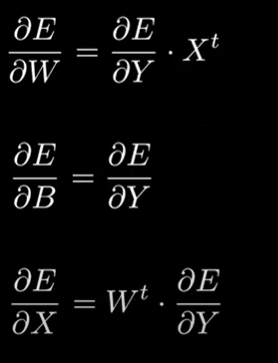

## Detailed Explanation of how each was found... 

### finding the derivitive of the error with respect to weights: 
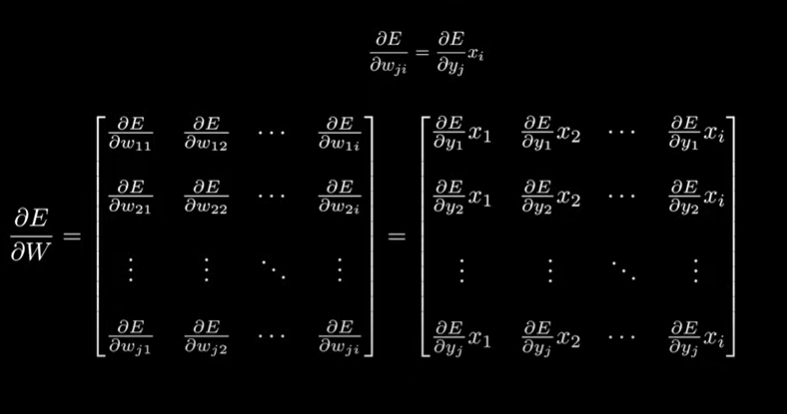

#### With this we can notice some repetitions.. lets simplify this as a form of matrix multiplication! 
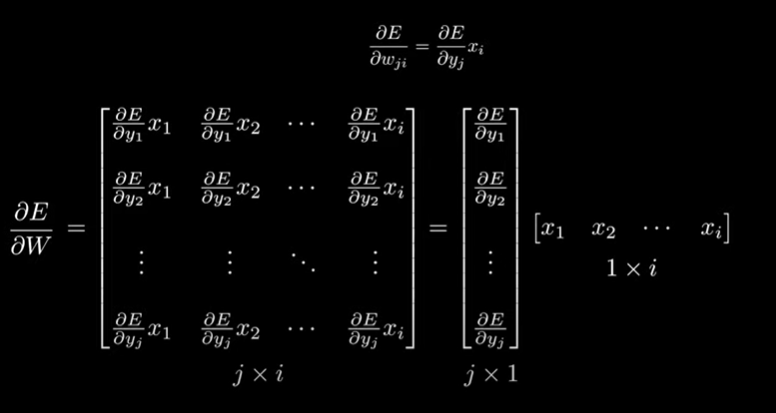

### For who that didnt still get it, Here are some hand written notes that go more in depth: 

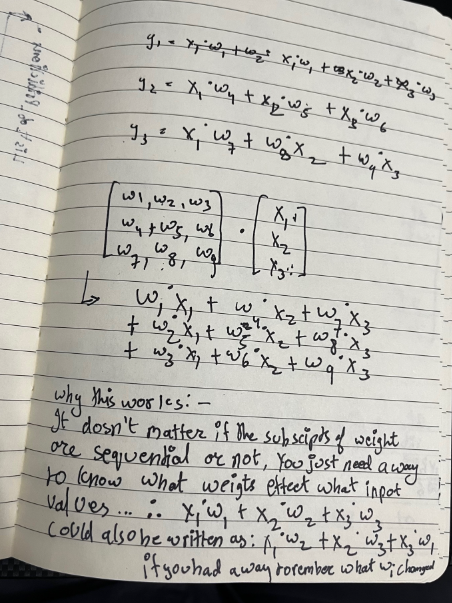

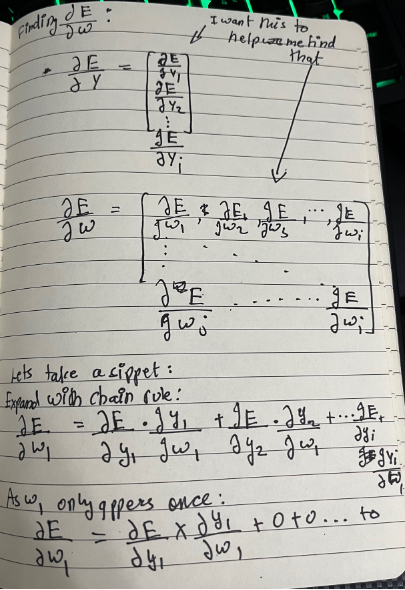

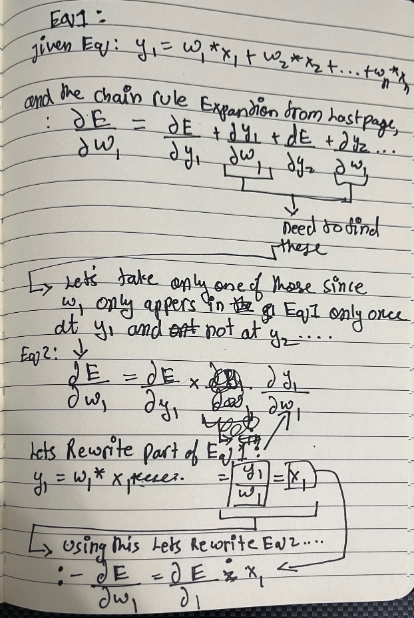

#### using that, we can genralize the derivitive of a error in respect to a weight in the following way: 
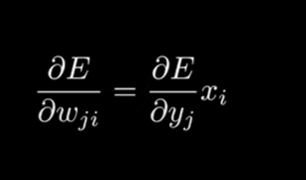 
#### Usign that formula for all the elements in the intial matrix, we get this, same as the image before the notes:  
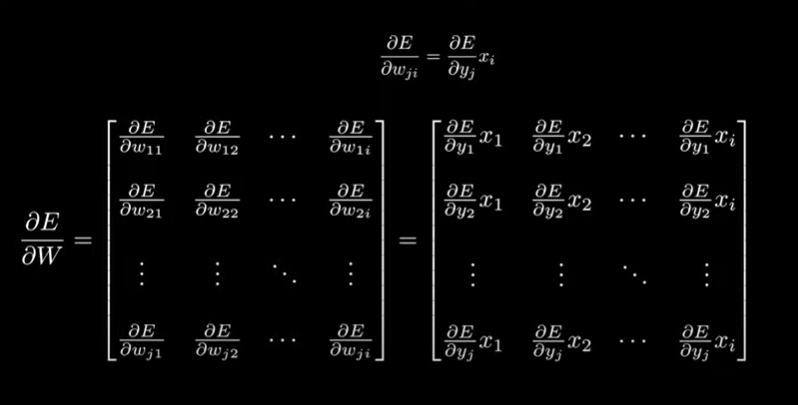
#### This can be expressed as a matrix multiplication as: 
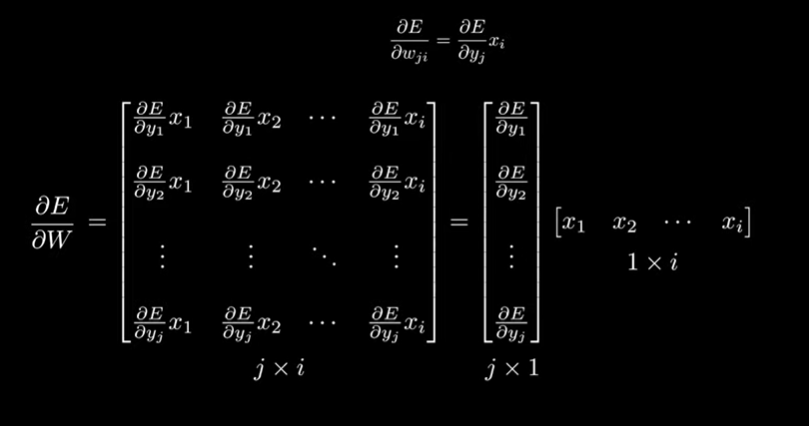
#### This is the same as: 
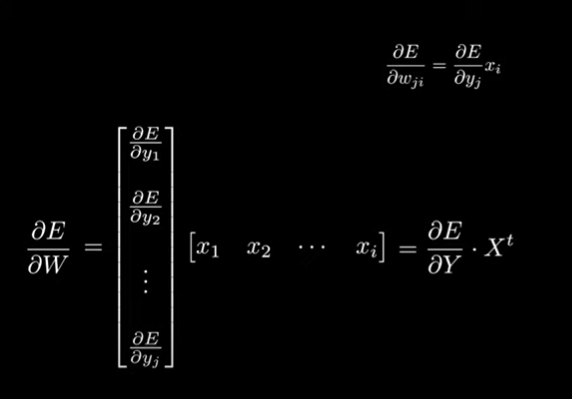

## Finding the deriviive of the error with respect to the Input:
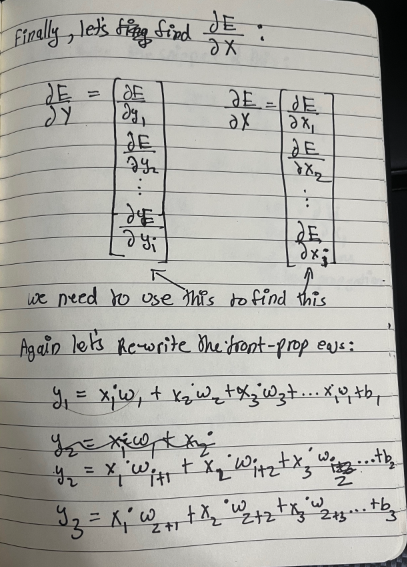

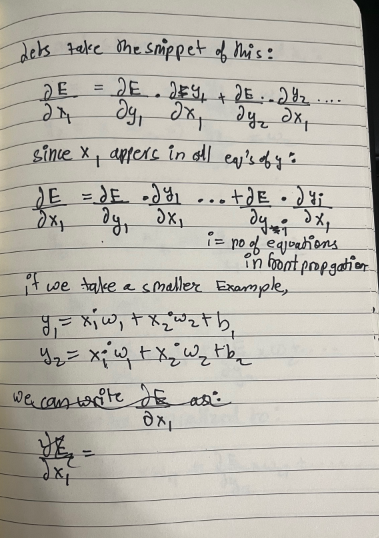

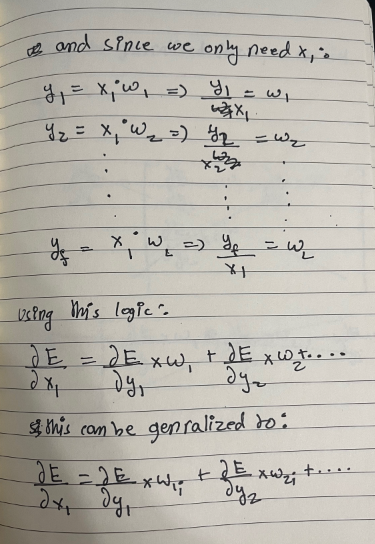

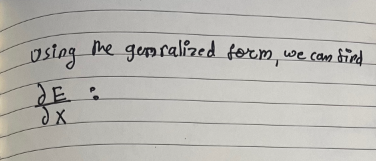

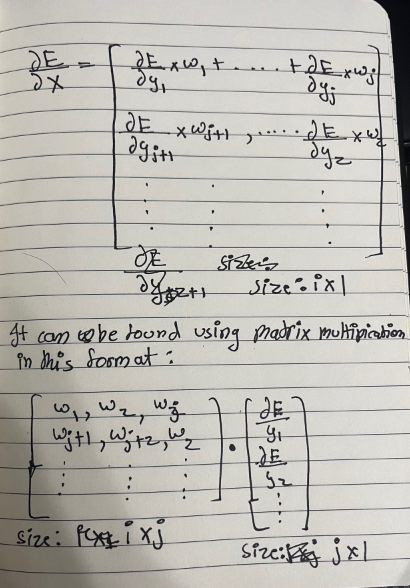

## Finding the deriviive of the error with respect to the Bias:
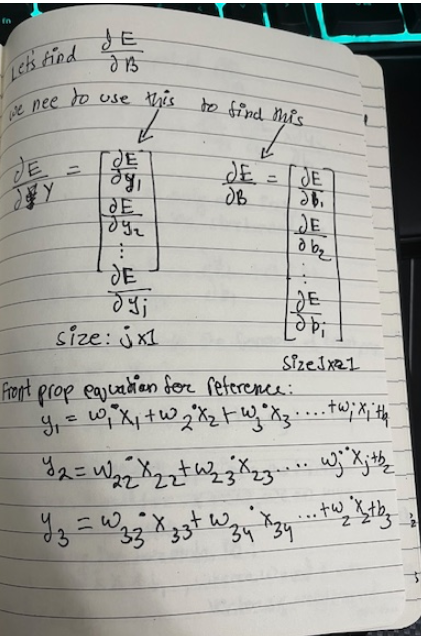

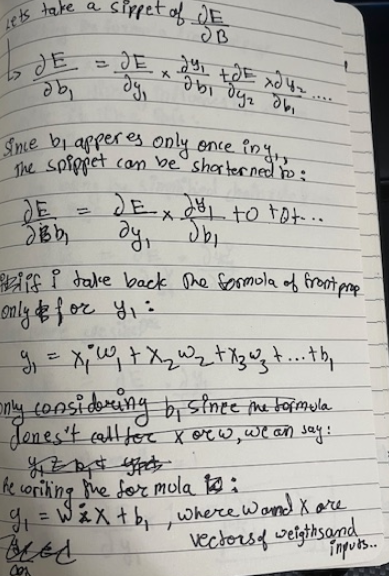

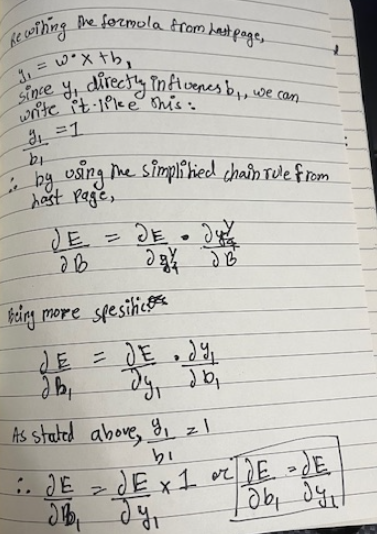

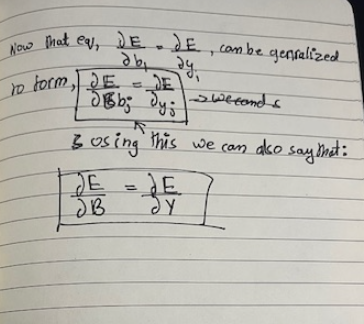



